In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [503]:
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


In [504]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
s=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [505]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [506]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [507]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [508]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [509]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [510]:
train['Mr','Mrs','Miss']=train['Name'].str.split(', ').str[1].str.split('.').str[0].str.strip()
test['Mr','Mrs','Miss']=test['Name'].str.split(', ').str[1].str.split('.').str[0].str.strip()


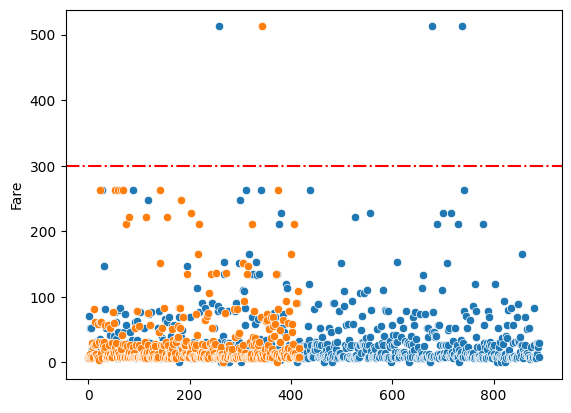

In [511]:
sns.scatterplot(train,x=train.index,y='Fare')
sns.scatterplot(test,x=test.index,y='Fare')
plt.axhline(y=300,color='red',linestyle='-.')
train=train[train['Fare']<300]
plt.show()

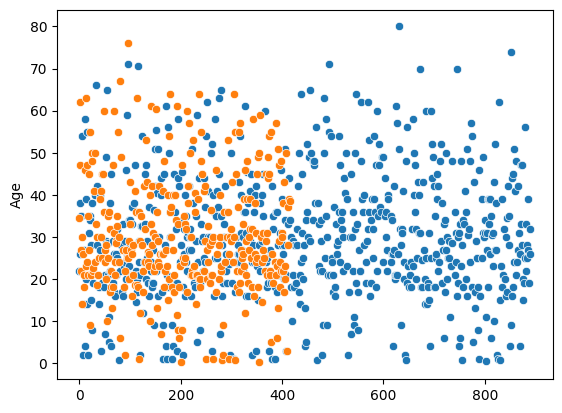

In [512]:
sns.scatterplot(train,x=train.index,y='Age')
sns.scatterplot(test,x=test.index,y='Age')
plt.show()

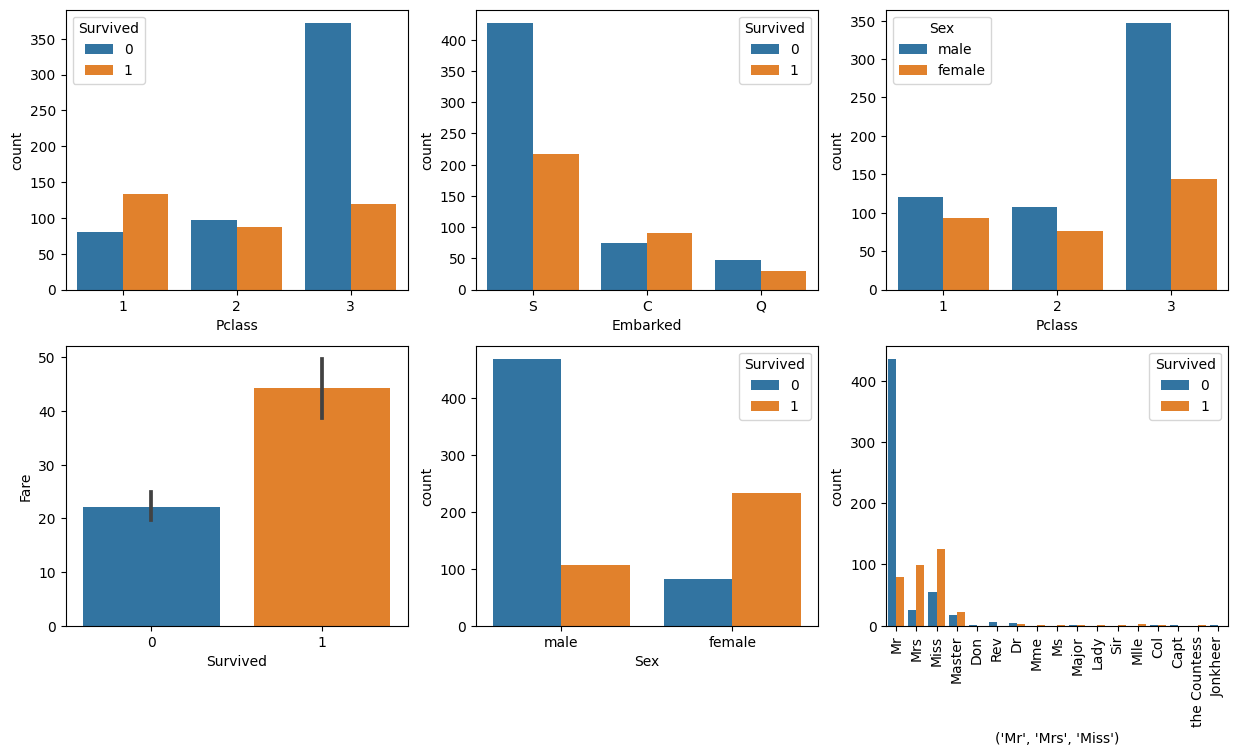

In [513]:
fig,ax=plt.subplots(2,3,figsize=(15,8))
sns.countplot(train,x='Pclass',hue='Survived',ax=ax[0,0])
sns.countplot(train,x='Embarked',hue='Survived',ax=ax[0,1])
sns.countplot(train,x='Pclass',hue='Sex',ax=ax[0,2])
sns.barplot(train,x='Survived',y='Fare',ax=ax[1,0])
sns.countplot(train,x='Sex',hue='Survived',ax=ax[1,1])
sns.countplot(train,x=('Mr','Mrs','Miss'),hue='Survived',ax=ax[1,2])
plt.xticks(rotation=90)
plt.show()

In [514]:

train.drop(['PassengerId','Name','Ticket','Cabin','Age'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','Cabin','Age'],axis=1,inplace=True)

train=pd.get_dummies(train)
test=pd.get_dummies(test)

train.drop(["('Mr', 'Mrs', 'Miss')_Mlle","('Mr', 'Mrs', 'Miss')_Sir","('Mr', 'Mrs', 'Miss')_the Countess","('Mr', 'Mrs', 'Miss')_the Countess","('Mr', 'Mrs', 'Miss')_Mme","('Mr', 'Mrs', 'Miss')_Jonkheer","('Mr', 'Mrs', 'Miss')_Capt","('Mr', 'Mrs', 'Miss')_Don","('Mr', 'Mrs', 'Miss')_Major","('Mr', 'Mrs', 'Miss')_Lady"],axis=1,inplace=True)
test.drop(["('Mr', 'Mrs', 'Miss')_Dona"],axis=1,inplace=True)

train.dropna(inplace=True)
test.fillna({'Fare':test.Fare.median()})

x=train.drop('Survived',axis=1)
y=train[['Survived']]

ss=StandardScaler()
x=ss.fit_transform(x)
test=ss.fit_transform(test)

In [515]:
cor=train.corrwith(train['Survived']).abs().sort_values(ascending=False)
cor

Survived                        1.000000
('Mr', 'Mrs', 'Miss')_Mr        0.552324
Sex_female                      0.545899
Sex_male                        0.545899
('Mr', 'Mrs', 'Miss')_Mrs       0.341791
Pclass                          0.334068
('Mr', 'Mrs', 'Miss')_Miss      0.327420
Fare                            0.261742
Embarked_C                      0.160969
Embarked_S                      0.149815
('Mr', 'Mrs', 'Miss')_Master    0.086390
Parch                           0.082157
('Mr', 'Mrs', 'Miss')_Rev       0.064812
('Mr', 'Mrs', 'Miss')_Ms        0.042729
SibSp                           0.033395
('Mr', 'Mrs', 'Miss')_Col       0.011564
('Mr', 'Mrs', 'Miss')_Dr        0.008590
Embarked_Q                      0.004981
dtype: float64

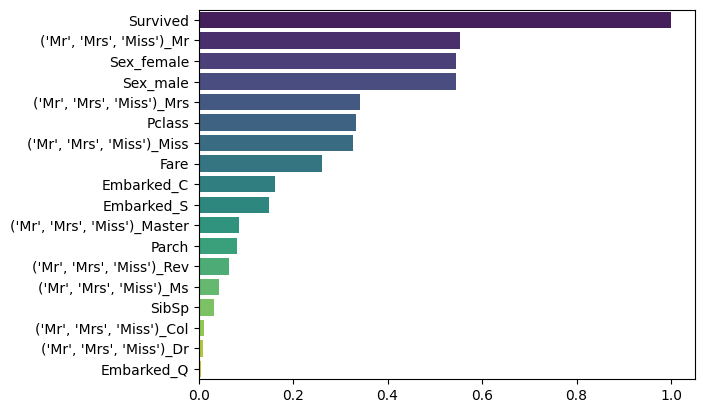

In [516]:
sns.barplot(x=cor.values,y=cor.index,palette='viridis')
plt.show()

In [517]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

**Model**

/tmp/ipykernel_33/3514397332.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


0.8258426966292135


<Axes: >

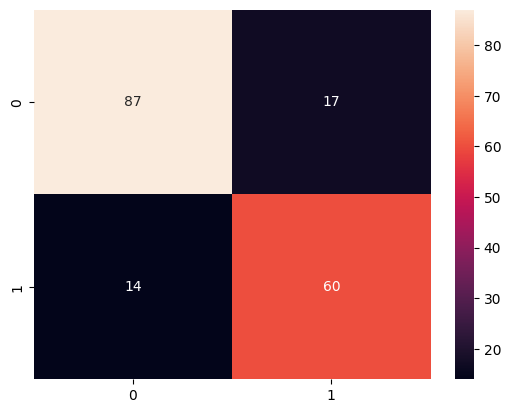

In [518]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(xtrain,ytrain)
print(accuracy_score(ytest,rf.predict(xtest)))
sns.heatmap(confusion_matrix(ytest,rf.predict(xtest)),annot=True)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8146067415730337


<Axes: >

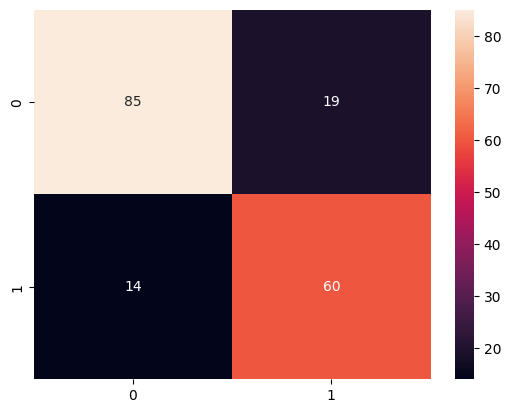

In [519]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
print(accuracy_score(ytest,lr.predict(xtest)))
sns.heatmap(confusion_matrix(ytest,lr.predict(xtest)),annot=True)

0.8426966292134831


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

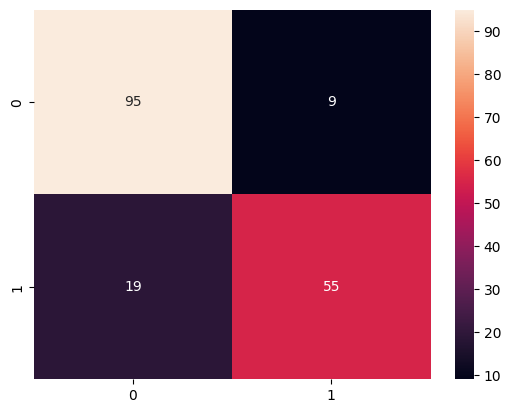

In [520]:
sm=SVC()
sm.fit(xtrain,ytrain)
print(accuracy_score(ytest,sm.predict(xtest)))
sns.heatmap(confusion_matrix(ytest,sm.predict(xtest)),annot=True)

0.8426966292134831


<Axes: >

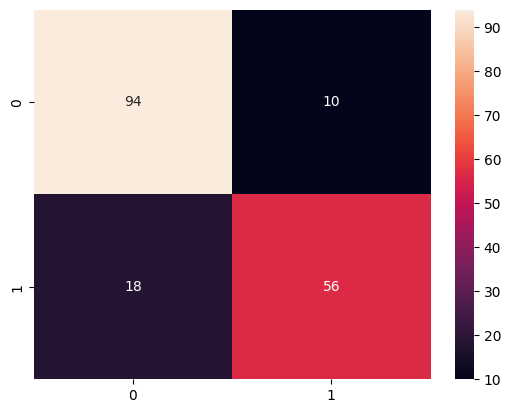

In [521]:
cat=CatBoostClassifier(verbose=False)
cat.fit(xtrain,ytrain)
print(accuracy_score(ytest,cat.predict(xtest)))
sns.heatmap(confusion_matrix(ytest,cat.predict(xtest)),annot=True)

0.8426966292134831


<Axes: >

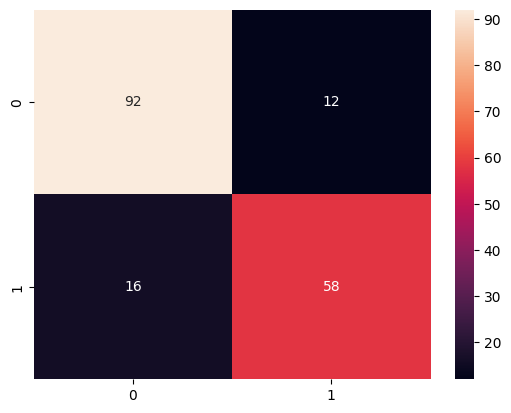

In [522]:
xgb_model = XGBClassifier()
xgb_model.fit(xtrain,ytrain)
print(accuracy_score(ytest,xgb_model.predict(xtest)))
sns.heatmap(confusion_matrix(ytest,xgb_model.predict(xtest)),annot=True)

In [523]:
print(test.shape,x.shape)

(418, 17) (888, 17)


In [525]:
cat=CatBoostClassifier(verbose=False)
cat.fit(x,y)
pred=cat.predict(test)

In [527]:
s['Survived']=pred

In [529]:
s.to_csv('sub',index=False)